In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# reading test data
train_df= pd.read_parquet('/content/drive/MyDrive/train.parquet', engine= 'pyarrow')
print(train_df.head(2))

                            Patient-Uid       Date           Incident
0  a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2019-03-09  PRIMARY_DIAGNOSIS
1  a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f 2015-05-16  PRIMARY_DIAGNOSIS


In [ ]:
# filter target drug data
target_df = train_df[train_df['Incident'] =='TARGET DRUG']

In [ ]:
# Create a new column for month
target_df['Month'] = target_df['Date'].dt.month

In [ ]:
# Create a pivot table to count the number of incidents for each patient and month
pivot_df = pd.pivot_table(target_df, index = 'Patient-Uid', columns='Month',aggfunc='size', fill_value=0)

In [ ]:
# Convert pivot table to numpy array
X = pivot_df.to_numpy()
# Normalize matrix by row
norm = pivot_df.div(pivot_df.sum(axis=1), axis=0)

In [ ]:
# K-means clustering model generating
kmeans = KMeans(n_clusters=4)
cluster = kmeans.fit_predict(norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


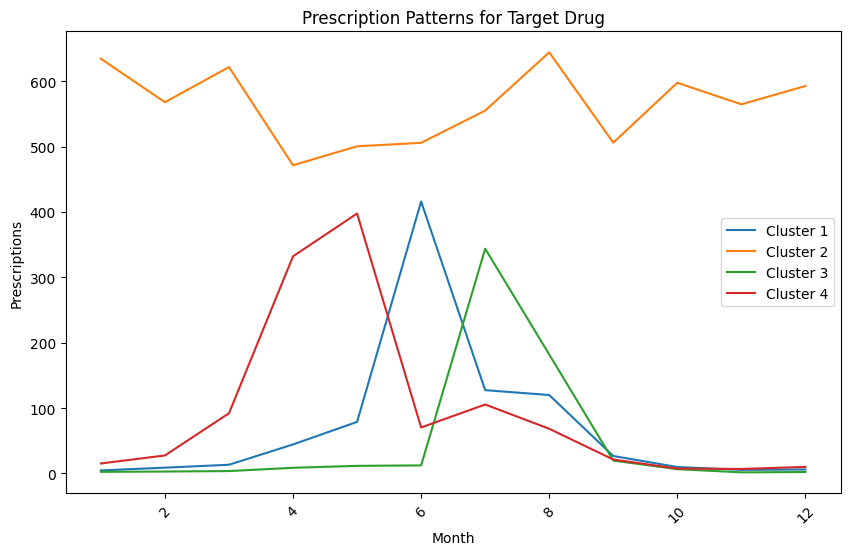

In [ ]:
# to do visualization we need to plot the precription patterns for each cluster
plt.figure(figsize=(10, 6))
for cluster_id in range(len(np.unique(cluster))):
    cluster_data = norm[cluster == cluster_id]
    prescription_counts = cluster_data.sum()
    plt.plot(prescription_counts.index, prescription_counts.values, label=f'Cluster {cluster_id + 1}')
    
plt.xlabel('Month')
plt.ylabel('Prescriptions')
plt.legend()
plt.title('Prescription Patterns for Target Drug')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='months', ylabel='Average prescription'>

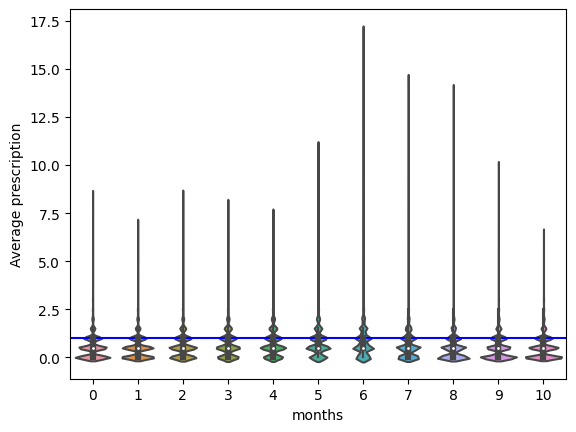

In [ ]:
# Create an empty list to store the individual series
s = []

# Iterate through the range of columns
for i in range(0, len(pivot_df.columns) - 1):
    # Calculate the average of two sequential columns
    a = (pivot_df.iloc[:, i] + pivot_df.iloc[:, i+1]) / 2
    s.append(a)

# Combine the series into a single DataFrame
combined_df = pd.concat(s, axis=1)

# Plot the violin plot
plt.axhline(y=1, color='blue', linestyle='-')
plt.xlabel("months")
plt.ylabel("Average prescription")
sns.violinplot( data=combined_df)